In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [23]:
apple = pd.read_csv("C:/Users/Dhruva D K/Desktop/APP/AAPL7.csv")
apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-04-2000,1.209821,1.245536,0.936384,1.107701,0.937779,8662404800
1,01-05-2000,1.114955,1.127232,0.729911,0.750000,0.634950,9807750400
2,01-06-2000,0.729911,1.029018,0.717634,0.935268,0.791798,8105204800
3,01-07-2000,0.930804,1.082589,0.837054,0.907366,0.768175,5746770400
4,01-08-2000,0.898438,1.098214,0.790179,1.088170,0.921244,5636086400
...,...,...,...,...,...,...,...
284,01-12-2023,190.330002,199.619995,187.449997,192.529999,192.284637,1062774800
285,01-01-2024,187.149994,196.380005,180.169998,184.399994,184.164993,1187219300
286,01-02-2024,183.990005,191.050003,179.250000,180.750000,180.519653,1161627000
287,01-03-2024,179.550003,180.529999,168.490005,173.229996,173.229996,586472000


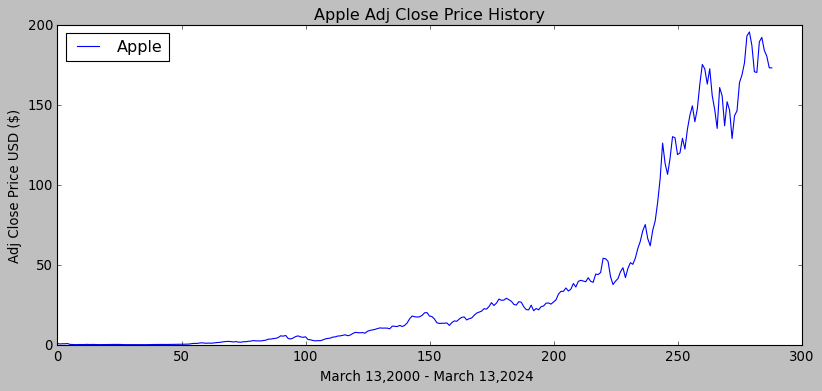

In [35]:
plt.figure(figsize=(12, 5))
plt.plot(apple['Adj Close'], label='Apple')
plt.title('Apple Adj Close Price History')
plt.xlabel("March 13,2000 - March 13,2024 ")
plt.ylabel("Adj Close Price USD ($)")
plt.legend(loc="upper left")
plt.show()

In [28]:
sma30 = pd.DataFrame()
sma30['Adj Close Price'] = apple['Adj Close'].rolling(window=30).mean()
sma30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
284,161.481685
285,162.833737
286,163.868356
287,164.992035


In [29]:
sma100 = pd.DataFrame()
sma100['Adj Close Price'] = apple['Adj Close'].rolling(window=100).mean()
sma100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
284,87.091824
285,88.683822
286,90.218543
287,91.683083


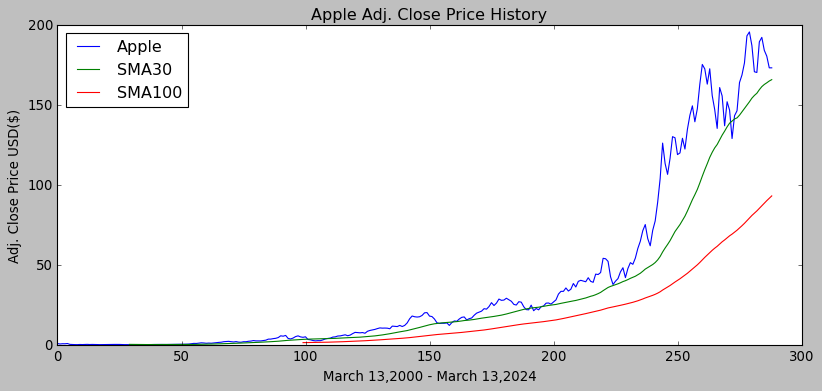

In [37]:
plt.figure(figsize=(12,5))
plt.plot(apple['Adj Close'], label='Apple')
plt.plot(sma30['Adj Close Price'], label='SMA30')
plt.plot(sma100['Adj Close Price'], label='SMA100')
plt.title("Apple Adj. Close Price History")
plt.xlabel('March 13,2000 - March 13,2024')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [31]:
data = pd.DataFrame()
data['apple'] = apple['Adj Close']
data['SMA30'] = sma30['Adj Close Price']
data['SMA100'] = sma100['Adj Close Price']
data

,apple,SMA30,SMA100
0,0.937779,NaN,NaN
1,0.634950,NaN,NaN
2,0.791798,NaN,NaN
3,0.768175,NaN,NaN
4,0.921244,NaN,NaN
...,...,...,...
284,192.284637,161.481685,87.091824
285,184.164993,162.833737,88.683822
286,180.519653,163.868356,90.218543
287,173.229996,164.992035,91.683083


In [32]:
def buySell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data)):
    if data ['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['apple'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['apple'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [33]:
buySell = buySell(data)
data['Buy Signal Price'] = buySell[0]
data['Sell Signal Price'] = buySell[1]
# To show the data
data

,apple,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,0.937779,NaN,NaN,NaN,NaN
1,0.634950,NaN,NaN,NaN,NaN
2,0.791798,NaN,NaN,NaN,NaN
3,0.768175,NaN,NaN,NaN,NaN
4,0.921244,NaN,NaN,NaN,NaN
...,...,...,...,...,...
284,192.284637,161.481685,87.091824,NaN,NaN
285,184.164993,162.833737,88.683822,NaN,NaN
286,180.519653,163.868356,90.218543,NaN,NaN
287,173.229996,164.992035,91.683083,NaN,NaN


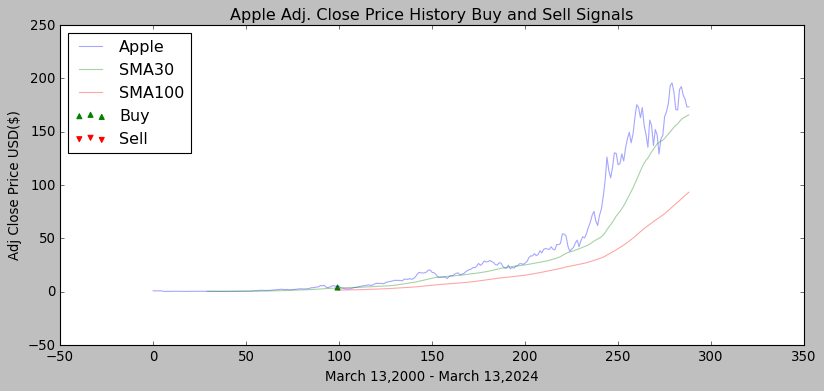

In [38]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(data['apple'], label='Apple', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(data.index, data['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel("March 13,2000 - March 13,2024")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()